In [1]:
import geopandas as gpd
import pandas as pd
from sklearn.cluster import DBSCAN
from shapely.ops import unary_union
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
# import libpysal

In [2]:
from shapely import wkt

blocks = pd.read_csv("data/Census_Block_Groups_2020_20240131.csv")
blocks['geometry'] = blocks['the_geom'].apply(wkt.loads)
blocks.drop(columns=['the_geom'], inplace=True)
blocks = gpd.GeoDataFrame(blocks, crs='EPSG:4326')
blocks

,OBJECTID,GEOID,CTBLOCKGROUP,CT,BLOCKGROUP,Shape_Length,Shape_Area,geometry
0,1807,60730200191,200191,20019,1,19520.779251,1.281500e+07,"MULTIPOLYGON (((-117.20764 33.14182, -117.2077..."
1,1676,60730189034,189034,18903,4,10026.669194,5.460566e+06,"MULTIPOLYGON (((-117.25339 33.39086, -117.2527..."
2,878,60730108001,108001,10800,1,8502.270733,3.821664e+06,"MULTIPOLYGON (((-117.17970 32.68618, -117.1798..."
3,1009,60730133211,133211,13321,1,8139.283833,3.846955e+06,"MULTIPOLYGON (((-116.95831 32.62129, -116.9582..."
4,1061,60730134232,134232,13423,2,69292.332370,1.599042e+08,"MULTIPOLYGON (((-116.96373 32.70351, -116.9636..."
...,...,...,...,...,...,...,...,...
2052,1770,60730198031,198031,19803,1,29357.559885,1.915028e+07,"MULTIPOLYGON (((-117.29525 33.17992, -117.2946..."
2053,28,60730008002,8002,800,2,5298.407410,1.534904e+06,"MULTIPOLYGON (((-117.13792 32.74383, -117.1379..."
2054,1677,60730189041,189041,18904,1,7466.510835,3.467576e+06,"MULTIPOLYGON (((-117.25363 33.37684, -117.2536..."
2055,1628,60730186012,186012,18601,2,15011.933296,9.543736e+06,"MULTIPOLYGON (((-117.34560 33.23710, -117.3448..."


In [3]:
df = gpd.read_file('data/BUSINESS_SITES.shp')
df = df[df['POINT_X'] >= 10]
df = df.to_crs(blocks.crs)
df

,APN,BCCCODE,OWNNAM1,OWNNAM2,OWNNAM3,CAREOF,STRNUM,STRFRA,STRDIR,STRNAM,STRTYP,STRSRM,CITY,STATE,CONTRY,ZIPCD1,ZIPCD2,LOCCOD,LOCNUM,LOCFRA,LOCDIR,LOCNAM,LOCTYP,LOCSRM,LOCCIT,BUSTYPE,SITE_ADDRE,POINT_X,POINT_Y,geometry
0,1.010101e+09,131.0,PACIFIC MARINE CREDIT UNION,None,None,ATTN ACCOUNTING DEPT,1278.0,None,None,ROCKY POINT,DR,None,OCEANSIDE,CA,None,92056.0,0.0,None,525111.0,None,None,BASILONE,RD,000501,CAMP PENDLETON,CREDIT UNION EXEMPT,525111 BASILONE RD,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132)
1,1.010101e+09,291.0,HRB TAX GROUP INC,H&R BLOCK #6438,None,ATTN BUSINESS PP TAX #6438,1.0,None,None,H&R BLOCK,WAY,None,KANSAS CITY,MO,None,64105.0,0.0,None,0.0,None,None,CAMP PENDLETON,None,None,OCEANSIDE,ACCOUNTANT,0 CAMP PENDLETON,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132)
2,1.010101e+09,314.0,NORTH COUNTY PIZZA INC,DBA DOMINOS PIZZA #8357,None,None,0.0,None,None,PO BOX 4489,None,None,OCEANSIDE,CA,None,92052.0,0.0,None,520407.0,None,None,BASILONE,RD,None,CAMP PENDLETON,CAFE-FAST FOOD,520407 BASILONE RD,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132)
3,1.010101e+09,314.0,PIAZZA MANAGEMENT CORPORATION,OF SAN DIEGO,PIAZZA FAMILY RESTAURANTS INC,DBA MCDONALDS #34729,23113.0,None,None,PLAZA POINTE,DR,#100,LAGUNA HILLS,CA,None,92653.0,0.0,None,430314.0,None,None,BROWN,ST,None,CAMP PENDLETON,CAFE-FAST FOOD,430314 BROWN ST,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132)
4,1.010101e+09,404.0,BRIDGESTONE RETAIL,OPERATIONS LLC,DBA FIRESTONE COMPLT AUTO CARE,ATTN TAX DEPT,200.0,None,S,4TH,AVE,#100,NASHVILLE,TN,None,37201.0,0.0,None,51091.0,None,None,BASILONE,RD,None,CAMP PENDLETON,TIRES&GENERAL MERCH,51091 BASILONE RD,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98158,0.000000e+00,261.0,XTRA INC,OFFICE EQUIP&FURN SEE APT HSE,#472-440-02-00,None,0.0,None,None,None,None,None,None,None,None,0.0,0.0,None,5802.0,None,None,UNIVERSITY,AVE,None,SAN DIEGO,APARTMENTS,5802 UNIVERSITY AVE,6.308874e+06,1.853500e+06,POINT (-117.07218 32.74956)
98159,0.000000e+00,264.0,HONEYCOMB BUSINESS,(A CALIF CORP),DBA LA PETITE ROUGE,None,6840.0,None,None,EL CAJON,BLVD,None,SAN DIEGO,CA,None,92115.0,0.0,None,6844.0,None,None,EL CAJON,BLVD,None,SAN DIEGO,MOTEL FURNISHINGS,6844 EL CAJON BLVD,6.315622e+06,1.860472e+06,POINT (-117.05041 32.76886)
98160,0.000000e+00,298.0,ADVANCED LOGISTICS TECH INC,EQUIPMENT LOCATED AT NAVAL,COMM CONTROL & OCEAN SURV CTR,None,7968.0,None,None,ARJONS,DR,#101,SAN DIEGO,CA,None,92126.0,0.0,None,271.0,None,None,CATALINA,BLVD,None,SAN DIEGO,MISC PROFESSIONAL,271 CATALINA BLVD,6.254424e+06,1.839227e+06,POINT (-117.24882 32.70902)
98161,0.000000e+00,298.0,AT&T,EQUIPMENT LOCATED AT NAVAL,COMM CONTROL & OCEAN SURV CTR,None,3940.0,None,None,7TH,AVE,None,SAN DIEGO,CA,None,92103.0,0.0,None,271.0,None,None,CATALINA,BLVD,None,SAN DIEGO,MISC PROFESSIONAL,271 CATALINA BLVD,6.254424e+06,1.839227e+06,POINT (-117.24882 32.70902)


#### Plotting Initial Sites & Geographies

<Axes: >

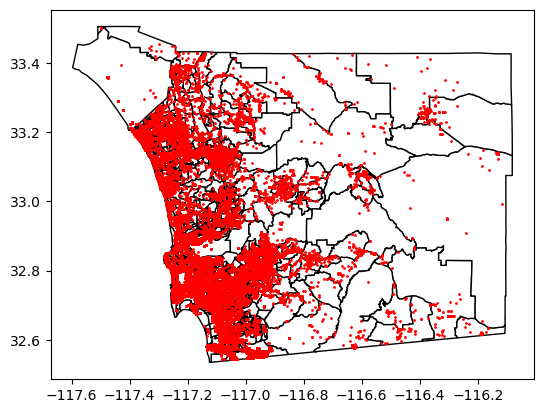

In [4]:
base = blocks.plot(color='white', edgecolor='black')

df.plot(ax=base, marker='o', color='red', markersize=1)

In [5]:
# Join the nearest blocks to each business
joined_blocks = df.sjoin_nearest(blocks)
joined_blocks

/Users/kelvinnguyen/anaconda3/envs/gpd/lib/python3.11/site-packages/geopandas/array.py:365: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


,APN,BCCCODE,OWNNAM1,OWNNAM2,OWNNAM3,CAREOF,STRNUM,STRFRA,STRDIR,STRNAM,STRTYP,STRSRM,CITY,STATE,CONTRY,ZIPCD1,ZIPCD2,LOCCOD,LOCNUM,LOCFRA,LOCDIR,LOCNAM,LOCTYP,LOCSRM,LOCCIT,BUSTYPE,SITE_ADDRE,POINT_X,POINT_Y,geometry,index_right,OBJECTID,GEOID,CTBLOCKGROUP,CT,BLOCKGROUP,Shape_Length,Shape_Area
0,1.010101e+09,131.0,PACIFIC MARINE CREDIT UNION,None,None,ATTN ACCOUNTING DEPT,1278.0,None,None,ROCKY POINT,DR,None,OCEANSIDE,CA,None,92056.0,0.0,None,525111.0,None,None,BASILONE,RD,000501,CAMP PENDLETON,CREDIT UNION EXEMPT,525111 BASILONE RD,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),1141,1688,60730190011,190011,19001,1,251536.838631,1.312856e+09
1,1.010101e+09,291.0,HRB TAX GROUP INC,H&R BLOCK #6438,None,ATTN BUSINESS PP TAX #6438,1.0,None,None,H&R BLOCK,WAY,None,KANSAS CITY,MO,None,64105.0,0.0,None,0.0,None,None,CAMP PENDLETON,None,None,OCEANSIDE,ACCOUNTANT,0 CAMP PENDLETON,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),1141,1688,60730190011,190011,19001,1,251536.838631,1.312856e+09
2,1.010101e+09,314.0,NORTH COUNTY PIZZA INC,DBA DOMINOS PIZZA #8357,None,None,0.0,None,None,PO BOX 4489,None,None,OCEANSIDE,CA,None,92052.0,0.0,None,520407.0,None,None,BASILONE,RD,None,CAMP PENDLETON,CAFE-FAST FOOD,520407 BASILONE RD,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),1141,1688,60730190011,190011,19001,1,251536.838631,1.312856e+09
3,1.010101e+09,314.0,PIAZZA MANAGEMENT CORPORATION,OF SAN DIEGO,PIAZZA FAMILY RESTAURANTS INC,DBA MCDONALDS #34729,23113.0,None,None,PLAZA POINTE,DR,#100,LAGUNA HILLS,CA,None,92653.0,0.0,None,430314.0,None,None,BROWN,ST,None,CAMP PENDLETON,CAFE-FAST FOOD,430314 BROWN ST,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),1141,1688,60730190011,190011,19001,1,251536.838631,1.312856e+09
4,1.010101e+09,404.0,BRIDGESTONE RETAIL,OPERATIONS LLC,DBA FIRESTONE COMPLT AUTO CARE,ATTN TAX DEPT,200.0,None,S,4TH,AVE,#100,NASHVILLE,TN,None,37201.0,0.0,None,51091.0,None,None,BASILONE,RD,None,CAMP PENDLETON,TIRES&GENERAL MERCH,51091 BASILONE RD,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),1141,1688,60730190011,190011,19001,1,251536.838631,1.312856e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95648,7.600511e+09,298.0,TOWNE PARK LLC,None,None,None,555.0,None,E,NORTH,LN,#5020,CONSHOHOCKEN,PA,None,19428.0,0.0,None,4000.0,None,None,CORONADO BAY,RD,None,CORONADO,MISC PROFESSIONAL,4000 CORONADO BAY RD,6.289835e+06,1.810825e+06,POINT (-117.13292 32.63184),720,876,60730106011,106011,10601,1,40259.552232,7.997295e+06
95649,7.600511e+09,305.0,ON COMMAND VIDEO CORP,(LOEWS CORONADO),SEE 3022910000,None,0.0,None,None,None,None,None,None,None,None,0.0,0.0,None,4000.0,None,None,CORONADO BAY,RD,None,CORONADO,ELECTRONIC RECORDING,4000 CORONADO BAY RD,6.289835e+06,1.810825e+06,POINT (-117.13292 32.63184),720,876,60730106011,106011,10601,1,40259.552232,7.997295e+06
95650,7.600511e+09,41.0,CORONADO CAYS YACHT CLUB,None,None,None,30.0,None,N,CARIBE CAY,BLVD,None,CORONADO,CA,None,92118.0,0.0,None,30.0,None,N,CARIBE CAY,BLVD,None,CORONADO,CLUBS - SOCIAL/SERVI,30 N CARIBE CAY BLVD,6.290574e+06,1.809162e+06,POINT (-117.13048 32.62729),720,876,60730106011,106011,10601,1,40259.552232,7.997295e+06
95659,7.600560e+09,528.0,BRIAN SMOCK GOLF LLC,DBA BRIAN SMOCK GOLF,None,None,2000.0,None,None,VISALIA,ROW,None,CORONADO,CA,None,92118.0,0.0,None,2000.0,None,None,VISALIA,ROW,None,CORONADO,SPECIALTY STORE-SOFT,2000 VISALIA ROW,6.279315e+06,1.830181e+06,POINT (-117.16765 32.68479),1820,880,60730109001,109001,10900,1,14964.745417,1.002034e+07


#### Creating New Shapes from K-Means clustering

In [6]:
# Cluster points together initially to get an idea of clusters, then use those clusters to create new shapes?

# kmeans using x, y values of businesses -> getting cluster labels -> finding nearest ctblock for those new labels, then dissolve

# Might just be better to use their k-means ++ rather than finding where things are based on the shape

from sklearn.cluster import KMeans

new_centers = blocks.loc[blocks['CTBLOCKGROUP'].isin(joined_blocks['CTBLOCKGROUP'].value_counts()
                                                                    .iloc[:70].index)].geometry.centroid

points = pd.DataFrame([joined_blocks['geometry'].x, joined_blocks['geometry'].y]).T.rename(columns={0: 'point_x', 1: 'point_y'})

# Assume 'data' is your DataFrame and 'geometry' is your geometry column
kmeans = KMeans(n_clusters=70)
kmeans.fit(points)

joined_blocks['cluster'] = kmeans.labels_

joined_blocks
# Get centers from clusters and use them as the centers to generate cluser

/var/folders/yx/7kn925_914qd3z72tqy9rlk80000gn/T/ipykernel_1880/3991396906.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  .iloc[:70].index)].geometry.centroid
/Users/kelvinnguyen/anaconda3/envs/gpd/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,APN,BCCCODE,OWNNAM1,OWNNAM2,OWNNAM3,CAREOF,STRNUM,STRFRA,STRDIR,STRNAM,STRTYP,STRSRM,CITY,STATE,CONTRY,ZIPCD1,ZIPCD2,LOCCOD,LOCNUM,LOCFRA,LOCDIR,LOCNAM,LOCTYP,LOCSRM,LOCCIT,BUSTYPE,SITE_ADDRE,POINT_X,POINT_Y,geometry,index_right,OBJECTID,GEOID,CTBLOCKGROUP,CT,BLOCKGROUP,Shape_Length,Shape_Area,cluster
0,1.010101e+09,131.0,PACIFIC MARINE CREDIT UNION,None,None,ATTN ACCOUNTING DEPT,1278.0,None,None,ROCKY POINT,DR,None,OCEANSIDE,CA,None,92056.0,0.0,None,525111.0,None,None,BASILONE,RD,000501,CAMP PENDLETON,CREDIT UNION EXEMPT,525111 BASILONE RD,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),1141,1688,60730190011,190011,19001,1,251536.838631,1.312856e+09,23
1,1.010101e+09,291.0,HRB TAX GROUP INC,H&R BLOCK #6438,None,ATTN BUSINESS PP TAX #6438,1.0,None,None,H&R BLOCK,WAY,None,KANSAS CITY,MO,None,64105.0,0.0,None,0.0,None,None,CAMP PENDLETON,None,None,OCEANSIDE,ACCOUNTANT,0 CAMP PENDLETON,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),1141,1688,60730190011,190011,19001,1,251536.838631,1.312856e+09,23
2,1.010101e+09,314.0,NORTH COUNTY PIZZA INC,DBA DOMINOS PIZZA #8357,None,None,0.0,None,None,PO BOX 4489,None,None,OCEANSIDE,CA,None,92052.0,0.0,None,520407.0,None,None,BASILONE,RD,None,CAMP PENDLETON,CAFE-FAST FOOD,520407 BASILONE RD,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),1141,1688,60730190011,190011,19001,1,251536.838631,1.312856e+09,23
3,1.010101e+09,314.0,PIAZZA MANAGEMENT CORPORATION,OF SAN DIEGO,PIAZZA FAMILY RESTAURANTS INC,DBA MCDONALDS #34729,23113.0,None,None,PLAZA POINTE,DR,#100,LAGUNA HILLS,CA,None,92653.0,0.0,None,430314.0,None,None,BROWN,ST,None,CAMP PENDLETON,CAFE-FAST FOOD,430314 BROWN ST,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),1141,1688,60730190011,190011,19001,1,251536.838631,1.312856e+09,23
4,1.010101e+09,404.0,BRIDGESTONE RETAIL,OPERATIONS LLC,DBA FIRESTONE COMPLT AUTO CARE,ATTN TAX DEPT,200.0,None,S,4TH,AVE,#100,NASHVILLE,TN,None,37201.0,0.0,None,51091.0,None,None,BASILONE,RD,None,CAMP PENDLETON,TIRES&GENERAL MERCH,51091 BASILONE RD,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),1141,1688,60730190011,190011,19001,1,251536.838631,1.312856e+09,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95648,7.600511e+09,298.0,TOWNE PARK LLC,None,None,None,555.0,None,E,NORTH,LN,#5020,CONSHOHOCKEN,PA,None,19428.0,0.0,None,4000.0,None,None,CORONADO BAY,RD,None,CORONADO,MISC PROFESSIONAL,4000 CORONADO BAY RD,6.289835e+06,1.810825e+06,POINT (-117.13292 32.63184),720,876,60730106011,106011,10601,1,40259.552232,7.997295e+06,43
95649,7.600511e+09,305.0,ON COMMAND VIDEO CORP,(LOEWS CORONADO),SEE 3022910000,None,0.0,None,None,None,None,None,None,None,None,0.0,0.0,None,4000.0,None,None,CORONADO BAY,RD,None,CORONADO,ELECTRONIC RECORDING,4000 CORONADO BAY RD,6.289835e+06,1.810825e+06,POINT (-117.13292 32.63184),720,876,60730106011,106011,10601,1,40259.552232,7.997295e+06,43
95650,7.600511e+09,41.0,CORONADO CAYS YACHT CLUB,None,None,None,30.0,None,N,CARIBE CAY,BLVD,None,CORONADO,CA,None,92118.0,0.0,None,30.0,None,N,CARIBE CAY,BLVD,None,CORONADO,CLUBS - SOCIAL/SERVI,30 N CARIBE CAY BLVD,6.290574e+06,1.809162e+06,POINT (-117.13048 32.62729),720,876,60730106011,106011,10601,1,40259.552232,7.997295e+06,43
95659,7.600560e+09,528.0,BRIAN SMOCK GOLF LLC,DBA BRIAN SMOCK GOLF,None,None,2000.0,None,None,VISALIA,ROW,None,CORONADO,CA,None,92118.0,0.0,None,2000.0,None,None,VISALIA,ROW,None,CORONADO,SPECIALTY STORE-SOFT,2000 VISALIA ROW,6.279315e+06,1.830181e+06,POINT (-117.16765 32.68479),1820,880,60730109001,109001,10900,1,14964.745417,1.002034e+07,26


<Axes: >

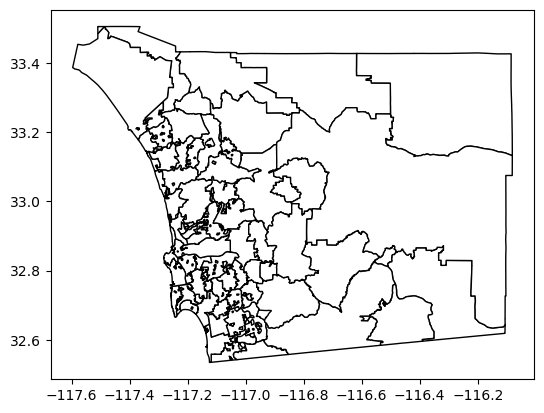

In [7]:
test1 = joined_blocks.groupby(['CTBLOCKGROUP', 'cluster'])['GEOID'].max().reset_index()
new_dict = test1.set_index('CTBLOCKGROUP')['cluster'].to_dict()

blocks['test'] = blocks['CTBLOCKGROUP'].map(new_dict)

new_blocks = blocks.dissolve(by='test').reset_index()
new_blocks.plot(color='white', edgecolor='black')

<Axes: >

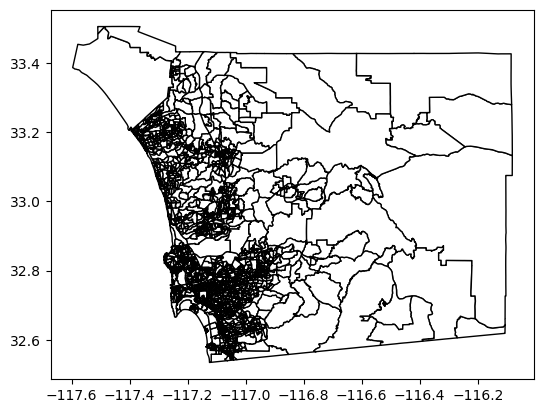

In [8]:
blocks.plot(color='white', edgecolor='black')

In [9]:
### Trying with k-means, centers outward

df['APN']

0        1.010101e+09
1        1.010101e+09
2        1.010101e+09
3        1.010101e+09
4        1.010101e+09
             ...     
98158    0.000000e+00
98159    0.000000e+00
98160    0.000000e+00
98161    0.000000e+00
98162    0.000000e+00
Name: APN, Length: 98162, dtype: float64

In [10]:
from sklearn.cluster import KMeans

centroids = blocks[blocks['CTBLOCKGROUP'].isin(joined_blocks['CTBLOCKGROUP'].value_counts().iloc[:70].index)]['geometry'].centroid

# Assume 'data' is your DataFrame and 'geometry' is your geometry column
kmeans = KMeans(n_clusters=70)
kmeans.cluster_centers_ = list(zip(centroids.x, centroids.y))
kmeans.fit(points)

joined_blocks['cluster'] = kmeans.labels_

joined_blocks


/var/folders/yx/7kn925_914qd3z72tqy9rlk80000gn/T/ipykernel_1880/613337971.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = blocks[blocks['CTBLOCKGROUP'].isin(joined_blocks['CTBLOCKGROUP'].value_counts().iloc[:70].index)]['geometry'].centroid
/Users/kelvinnguyen/anaconda3/envs/gpd/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,APN,BCCCODE,OWNNAM1,OWNNAM2,OWNNAM3,CAREOF,STRNUM,STRFRA,STRDIR,STRNAM,STRTYP,STRSRM,CITY,STATE,CONTRY,ZIPCD1,ZIPCD2,LOCCOD,LOCNUM,LOCFRA,LOCDIR,LOCNAM,LOCTYP,LOCSRM,LOCCIT,BUSTYPE,SITE_ADDRE,POINT_X,POINT_Y,geometry,index_right,OBJECTID,GEOID,CTBLOCKGROUP,CT,BLOCKGROUP,Shape_Length,Shape_Area,cluster
0,1.010101e+09,131.0,PACIFIC MARINE CREDIT UNION,None,None,ATTN ACCOUNTING DEPT,1278.0,None,None,ROCKY POINT,DR,None,OCEANSIDE,CA,None,92056.0,0.0,None,525111.0,None,None,BASILONE,RD,000501,CAMP PENDLETON,CREDIT UNION EXEMPT,525111 BASILONE RD,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),1141,1688,60730190011,190011,19001,1,251536.838631,1.312856e+09,64
1,1.010101e+09,291.0,HRB TAX GROUP INC,H&R BLOCK #6438,None,ATTN BUSINESS PP TAX #6438,1.0,None,None,H&R BLOCK,WAY,None,KANSAS CITY,MO,None,64105.0,0.0,None,0.0,None,None,CAMP PENDLETON,None,None,OCEANSIDE,ACCOUNTANT,0 CAMP PENDLETON,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),1141,1688,60730190011,190011,19001,1,251536.838631,1.312856e+09,64
2,1.010101e+09,314.0,NORTH COUNTY PIZZA INC,DBA DOMINOS PIZZA #8357,None,None,0.0,None,None,PO BOX 4489,None,None,OCEANSIDE,CA,None,92052.0,0.0,None,520407.0,None,None,BASILONE,RD,None,CAMP PENDLETON,CAFE-FAST FOOD,520407 BASILONE RD,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),1141,1688,60730190011,190011,19001,1,251536.838631,1.312856e+09,64
3,1.010101e+09,314.0,PIAZZA MANAGEMENT CORPORATION,OF SAN DIEGO,PIAZZA FAMILY RESTAURANTS INC,DBA MCDONALDS #34729,23113.0,None,None,PLAZA POINTE,DR,#100,LAGUNA HILLS,CA,None,92653.0,0.0,None,430314.0,None,None,BROWN,ST,None,CAMP PENDLETON,CAFE-FAST FOOD,430314 BROWN ST,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),1141,1688,60730190011,190011,19001,1,251536.838631,1.312856e+09,64
4,1.010101e+09,404.0,BRIDGESTONE RETAIL,OPERATIONS LLC,DBA FIRESTONE COMPLT AUTO CARE,ATTN TAX DEPT,200.0,None,S,4TH,AVE,#100,NASHVILLE,TN,None,37201.0,0.0,None,51091.0,None,None,BASILONE,RD,None,CAMP PENDLETON,TIRES&GENERAL MERCH,51091 BASILONE RD,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),1141,1688,60730190011,190011,19001,1,251536.838631,1.312856e+09,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95648,7.600511e+09,298.0,TOWNE PARK LLC,None,None,None,555.0,None,E,NORTH,LN,#5020,CONSHOHOCKEN,PA,None,19428.0,0.0,None,4000.0,None,None,CORONADO BAY,RD,None,CORONADO,MISC PROFESSIONAL,4000 CORONADO BAY RD,6.289835e+06,1.810825e+06,POINT (-117.13292 32.63184),720,876,60730106011,106011,10601,1,40259.552232,7.997295e+06,51
95649,7.600511e+09,305.0,ON COMMAND VIDEO CORP,(LOEWS CORONADO),SEE 3022910000,None,0.0,None,None,None,None,None,None,None,None,0.0,0.0,None,4000.0,None,None,CORONADO BAY,RD,None,CORONADO,ELECTRONIC RECORDING,4000 CORONADO BAY RD,6.289835e+06,1.810825e+06,POINT (-117.13292 32.63184),720,876,60730106011,106011,10601,1,40259.552232,7.997295e+06,51
95650,7.600511e+09,41.0,CORONADO CAYS YACHT CLUB,None,None,None,30.0,None,N,CARIBE CAY,BLVD,None,CORONADO,CA,None,92118.0,0.0,None,30.0,None,N,CARIBE CAY,BLVD,None,CORONADO,CLUBS - SOCIAL/SERVI,30 N CARIBE CAY BLVD,6.290574e+06,1.809162e+06,POINT (-117.13048 32.62729),720,876,60730106011,106011,10601,1,40259.552232,7.997295e+06,51
95659,7.600560e+09,528.0,BRIAN SMOCK GOLF LLC,DBA BRIAN SMOCK GOLF,None,None,2000.0,None,None,VISALIA,ROW,None,CORONADO,CA,None,92118.0,0.0,None,2000.0,None,None,VISALIA,ROW,None,CORONADO,SPECIALTY STORE-SOFT,2000 VISALIA ROW,6.279315e+06,1.830181e+06,POINT (-117.16765 32.68479),1820,880,60730109001,109001,10900,1,14964.745417,1.002034e+07,16


<Axes: >

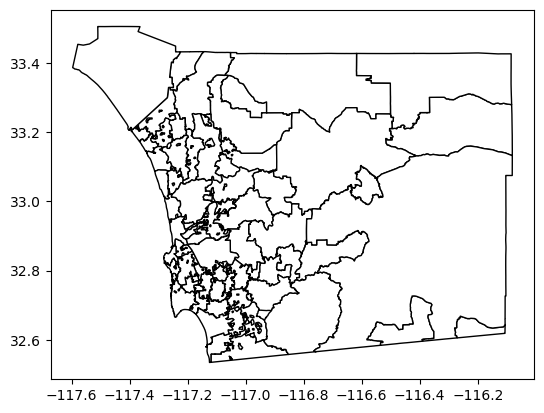

In [11]:
test1 = joined_blocks.groupby(['CTBLOCKGROUP', 'cluster'])['GEOID'].max().reset_index()
new_dict = test1.set_index('CTBLOCKGROUP')['cluster'].to_dict()

blocks['test'] = blocks['CTBLOCKGROUP'].map(new_dict)

new_blocks = blocks.dissolve(by='test').reset_index()
new_blocks.plot(color='white', edgecolor='black')

### Merging with Census Tract

In [12]:
## Try out Census Tract

tracts = pd.read_csv("data/Census_Tracts_2020_20240226.csv")
tracts['geometry'] = tracts['the_geom'].apply(wkt.loads)
tracts.drop(columns=['the_geom'], inplace=True)
tracts = gpd.GeoDataFrame(tracts, crs='EPSG:4326')
tracts

,OBJECTID,GEOID,CT,Shape_Length,Shape_Area,geometry
0,343,6073013315,13315,14731.300118,1.361873e+07,"MULTIPOLYGON (((-116.95513 32.64096, -116.9551..."
1,116,6073005500,5500,9038.712264,4.740261e+06,"MULTIPOLYGON (((-117.14639 32.72793, -117.1460..."
2,568,6073018517,18517,19968.703453,2.089468e+07,"MULTIPOLYGON (((-117.29359 33.19467, -117.2936..."
3,710,6073020813,20813,54680.988261,1.417909e+08,"MULTIPOLYGON (((-116.85075 33.05116, -116.8500..."
4,176,6073008339,8339,69458.557531,1.276369e+08,"MULTIPOLYGON (((-117.24555 32.93049, -117.2453..."
...,...,...,...,...,...,...
731,615,6073019303,19303,52571.063397,9.102588e+07,"MULTIPOLYGON (((-117.23317 33.25363, -117.2329..."
732,563,6073018510,18510,28092.429217,2.149973e+07,"MULTIPOLYGON (((-117.33332 33.21199, -117.3333..."
733,316,6073012302,12302,9265.775478,4.386708e+06,"MULTIPOLYGON (((-117.08225 32.63681, -117.0826..."
734,248,6073009308,9308,17602.726290,9.999563e+06,"MULTIPOLYGON (((-117.14104 32.77529, -117.1406..."


In [13]:
joined_tracts = df.sjoin_nearest(tracts)
joined_tracts

/Users/kelvinnguyen/anaconda3/envs/gpd/lib/python3.11/site-packages/geopandas/array.py:365: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


,APN,BCCCODE,OWNNAM1,OWNNAM2,OWNNAM3,CAREOF,STRNUM,STRFRA,STRDIR,STRNAM,STRTYP,STRSRM,CITY,STATE,CONTRY,ZIPCD1,ZIPCD2,LOCCOD,LOCNUM,LOCFRA,LOCDIR,LOCNAM,LOCTYP,LOCSRM,LOCCIT,BUSTYPE,SITE_ADDRE,POINT_X,POINT_Y,geometry,index_right,OBJECTID,GEOID,CT,Shape_Length,Shape_Area
0,1.010101e+09,131.0,PACIFIC MARINE CREDIT UNION,None,None,ATTN ACCOUNTING DEPT,1278.0,None,None,ROCKY POINT,DR,None,OCEANSIDE,CA,None,92056.0,0.0,None,525111.0,None,None,BASILONE,RD,000501,CAMP PENDLETON,CREDIT UNION EXEMPT,525111 BASILONE RD,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),54,599,6073019001,19001,333552.770299,1.779488e+09
1,1.010101e+09,291.0,HRB TAX GROUP INC,H&R BLOCK #6438,None,ATTN BUSINESS PP TAX #6438,1.0,None,None,H&R BLOCK,WAY,None,KANSAS CITY,MO,None,64105.0,0.0,None,0.0,None,None,CAMP PENDLETON,None,None,OCEANSIDE,ACCOUNTANT,0 CAMP PENDLETON,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),54,599,6073019001,19001,333552.770299,1.779488e+09
2,1.010101e+09,314.0,NORTH COUNTY PIZZA INC,DBA DOMINOS PIZZA #8357,None,None,0.0,None,None,PO BOX 4489,None,None,OCEANSIDE,CA,None,92052.0,0.0,None,520407.0,None,None,BASILONE,RD,None,CAMP PENDLETON,CAFE-FAST FOOD,520407 BASILONE RD,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),54,599,6073019001,19001,333552.770299,1.779488e+09
3,1.010101e+09,314.0,PIAZZA MANAGEMENT CORPORATION,OF SAN DIEGO,PIAZZA FAMILY RESTAURANTS INC,DBA MCDONALDS #34729,23113.0,None,None,PLAZA POINTE,DR,#100,LAGUNA HILLS,CA,None,92653.0,0.0,None,430314.0,None,None,BROWN,ST,None,CAMP PENDLETON,CAFE-FAST FOOD,430314 BROWN ST,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),54,599,6073019001,19001,333552.770299,1.779488e+09
4,1.010101e+09,404.0,BRIDGESTONE RETAIL,OPERATIONS LLC,DBA FIRESTONE COMPLT AUTO CARE,ATTN TAX DEPT,200.0,None,S,4TH,AVE,#100,NASHVILLE,TN,None,37201.0,0.0,None,51091.0,None,None,BASILONE,RD,None,CAMP PENDLETON,TIRES&GENERAL MERCH,51091 BASILONE RD,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),54,599,6073019001,19001,333552.770299,1.779488e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94923,6.786702e+09,93.0,TBRB HOLDINGS INC,DBA MASSAGE HEIGHTS,None,None,10413.0,None,None,CRAFTSMAN,WAY,#100,SAN DIEGO,CA,None,92127.0,0.0,None,10413.0,None,None,CRAFTSMAN,WAY,000100,SAN DIEGO,BODY CULTURE/MASSAGE,10413 CRAFTSMAN WAY,6.296469e+06,1.951806e+06,POINT (-117.11518 33.01946),565,515,6073017070,17070,24447.739661,2.817835e+07
94924,6.786702e+09,131.0,MYPOINT CREDIT UNION,None,None,C/O TAX DEPARTMENT,9420.0,None,None,FARNHAM,ST,None,SAN DIEGO,CA,None,92123.0,0.0,None,10413.0,None,None,CRAFTSMAN,WAY,000102,SAN DIEGO,CREDIT UNION EXEMPT,10413 CRAFTSMAN WAY,6.296469e+06,1.951806e+06,POINT (-117.11518 33.01946),565,515,6073017070,17070,24447.739661,2.817835e+07
94925,6.786702e+09,325.0,C&J KIDS CORPORATION,DBA KIDS CARE CLUB,None,None,10414.0,None,None,CRAFTSMAN,WAY,None,SAN DIEGO,CA,None,92127.0,0.0,None,10414.0,None,None,CRAFTSMAN,WAY,None,SAN DIEGO,PRE-SCHOOL/CHILDCARE,10414 CRAFTSMAN WAY,6.296518e+06,1.952057e+06,POINT (-117.11502 33.02015),565,515,6073017070,17070,24447.739661,2.817835e+07
94926,6.786710e+09,261.0,4S RANCH HOLDCO LLC,None,None,None,3501.0,None,None,JAMBOREE,RD,#3000,NEWPORT BEACH,CA,None,92660.0,0.0,None,10411.0,None,None,RESERVE,DR,None,SAN DIEGO,APARTMENTS,10411 RESERVE DR,6.295689e+06,1.952394e+06,POINT (-117.11774 33.02105),565,515,6073017070,17070,24447.739661,2.817835e+07


In [14]:
centroids_tract = tracts[tracts['CT'].isin(joined_tracts['CT'].value_counts().iloc[:70].index)]['geometry'].centroid

# Assume 'data' is your DataFrame and 'geometry' is your geometry column
kmeans_tracts = KMeans(n_clusters=70)
kmeans_tracts.cluster_centers_ = list(zip(centroids_tract.x, centroids_tract.y))
kmeans_tracts.fit(points)

joined_tracts['cluster'] = kmeans_tracts.labels_

joined_tracts

/var/folders/yx/7kn925_914qd3z72tqy9rlk80000gn/T/ipykernel_1880/4269134816.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids_tract = tracts[tracts['CT'].isin(joined_tracts['CT'].value_counts().iloc[:70].index)]['geometry'].centroid
/Users/kelvinnguyen/anaconda3/envs/gpd/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,APN,BCCCODE,OWNNAM1,OWNNAM2,OWNNAM3,CAREOF,STRNUM,STRFRA,STRDIR,STRNAM,STRTYP,STRSRM,CITY,STATE,CONTRY,ZIPCD1,ZIPCD2,LOCCOD,LOCNUM,LOCFRA,LOCDIR,LOCNAM,LOCTYP,LOCSRM,LOCCIT,BUSTYPE,SITE_ADDRE,POINT_X,POINT_Y,geometry,index_right,OBJECTID,GEOID,CT,Shape_Length,Shape_Area,cluster
0,1.010101e+09,131.0,PACIFIC MARINE CREDIT UNION,None,None,ATTN ACCOUNTING DEPT,1278.0,None,None,ROCKY POINT,DR,None,OCEANSIDE,CA,None,92056.0,0.0,None,525111.0,None,None,BASILONE,RD,000501,CAMP PENDLETON,CREDIT UNION EXEMPT,525111 BASILONE RD,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),54,599,6073019001,19001,333552.770299,1.779488e+09,45
1,1.010101e+09,291.0,HRB TAX GROUP INC,H&R BLOCK #6438,None,ATTN BUSINESS PP TAX #6438,1.0,None,None,H&R BLOCK,WAY,None,KANSAS CITY,MO,None,64105.0,0.0,None,0.0,None,None,CAMP PENDLETON,None,None,OCEANSIDE,ACCOUNTANT,0 CAMP PENDLETON,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),54,599,6073019001,19001,333552.770299,1.779488e+09,45
2,1.010101e+09,314.0,NORTH COUNTY PIZZA INC,DBA DOMINOS PIZZA #8357,None,None,0.0,None,None,PO BOX 4489,None,None,OCEANSIDE,CA,None,92052.0,0.0,None,520407.0,None,None,BASILONE,RD,None,CAMP PENDLETON,CAFE-FAST FOOD,520407 BASILONE RD,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),54,599,6073019001,19001,333552.770299,1.779488e+09,45
3,1.010101e+09,314.0,PIAZZA MANAGEMENT CORPORATION,OF SAN DIEGO,PIAZZA FAMILY RESTAURANTS INC,DBA MCDONALDS #34729,23113.0,None,None,PLAZA POINTE,DR,#100,LAGUNA HILLS,CA,None,92653.0,0.0,None,430314.0,None,None,BROWN,ST,None,CAMP PENDLETON,CAFE-FAST FOOD,430314 BROWN ST,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),54,599,6073019001,19001,333552.770299,1.779488e+09,45
4,1.010101e+09,404.0,BRIDGESTONE RETAIL,OPERATIONS LLC,DBA FIRESTONE COMPLT AUTO CARE,ATTN TAX DEPT,200.0,None,S,4TH,AVE,#100,NASHVILLE,TN,None,37201.0,0.0,None,51091.0,None,None,BASILONE,RD,None,CAMP PENDLETON,TIRES&GENERAL MERCH,51091 BASILONE RD,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),54,599,6073019001,19001,333552.770299,1.779488e+09,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94923,6.786702e+09,93.0,TBRB HOLDINGS INC,DBA MASSAGE HEIGHTS,None,None,10413.0,None,None,CRAFTSMAN,WAY,#100,SAN DIEGO,CA,None,92127.0,0.0,None,10413.0,None,None,CRAFTSMAN,WAY,000100,SAN DIEGO,BODY CULTURE/MASSAGE,10413 CRAFTSMAN WAY,6.296469e+06,1.951806e+06,POINT (-117.11518 33.01946),565,515,6073017070,17070,24447.739661,2.817835e+07,1
94924,6.786702e+09,131.0,MYPOINT CREDIT UNION,None,None,C/O TAX DEPARTMENT,9420.0,None,None,FARNHAM,ST,None,SAN DIEGO,CA,None,92123.0,0.0,None,10413.0,None,None,CRAFTSMAN,WAY,000102,SAN DIEGO,CREDIT UNION EXEMPT,10413 CRAFTSMAN WAY,6.296469e+06,1.951806e+06,POINT (-117.11518 33.01946),565,515,6073017070,17070,24447.739661,2.817835e+07,1
94925,6.786702e+09,325.0,C&J KIDS CORPORATION,DBA KIDS CARE CLUB,None,None,10414.0,None,None,CRAFTSMAN,WAY,None,SAN DIEGO,CA,None,92127.0,0.0,None,10414.0,None,None,CRAFTSMAN,WAY,None,SAN DIEGO,PRE-SCHOOL/CHILDCARE,10414 CRAFTSMAN WAY,6.296518e+06,1.952057e+06,POINT (-117.11502 33.02015),565,515,6073017070,17070,24447.739661,2.817835e+07,1
94926,6.786710e+09,261.0,4S RANCH HOLDCO LLC,None,None,None,3501.0,None,None,JAMBOREE,RD,#3000,NEWPORT BEACH,CA,None,92660.0,0.0,None,10411.0,None,None,RESERVE,DR,None,SAN DIEGO,APARTMENTS,10411 RESERVE DR,6.295689e+06,1.952394e+06,POINT (-117.11774 33.02105),565,515,6073017070,17070,24447.739661,2.817835e+07,8


<Axes: >

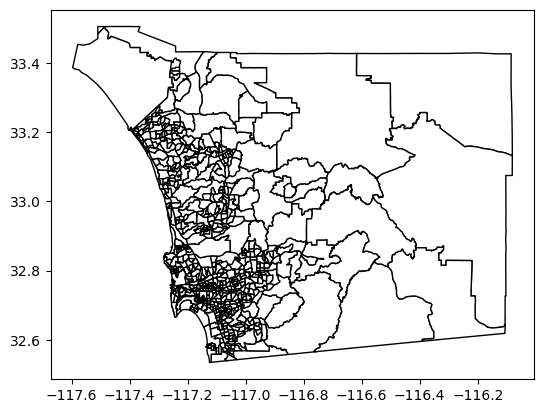

In [15]:
test1 = joined_tracts.groupby(['CT', 'cluster'])['GEOID'].max().reset_index()
new_dict = test1.set_index('CT')['cluster'].to_dict()

tracts['test'] = blocks['CT'].map(new_dict)

new_tracts = tracts.dissolve(by='test').reset_index()
new_tracts.plot(color='white', edgecolor='black')

In [16]:
joined_tracts_new = df.sjoin_nearest(new_tracts)
joined_tracts_new

/Users/kelvinnguyen/anaconda3/envs/gpd/lib/python3.11/site-packages/geopandas/array.py:365: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


,APN,BCCCODE,OWNNAM1,OWNNAM2,OWNNAM3,CAREOF,STRNUM,STRFRA,STRDIR,STRNAM,STRTYP,STRSRM,CITY,STATE,CONTRY,ZIPCD1,ZIPCD2,LOCCOD,LOCNUM,LOCFRA,LOCDIR,LOCNAM,LOCTYP,LOCSRM,LOCCIT,BUSTYPE,SITE_ADDRE,POINT_X,POINT_Y,geometry,index_right,test,OBJECTID,GEOID,CT,Shape_Length,Shape_Area
0,1.010101e+09,131.0,PACIFIC MARINE CREDIT UNION,None,None,ATTN ACCOUNTING DEPT,1278.0,None,None,ROCKY POINT,DR,None,OCEANSIDE,CA,None,92056.0,0.0,None,525111.0,None,None,BASILONE,RD,000501,CAMP PENDLETON,CREDIT UNION EXEMPT,525111 BASILONE RD,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),26,31.0,468,6073016813,16813,52868.356918,9.858394e+07
1,1.010101e+09,291.0,HRB TAX GROUP INC,H&R BLOCK #6438,None,ATTN BUSINESS PP TAX #6438,1.0,None,None,H&R BLOCK,WAY,None,KANSAS CITY,MO,None,64105.0,0.0,None,0.0,None,None,CAMP PENDLETON,None,None,OCEANSIDE,ACCOUNTANT,0 CAMP PENDLETON,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),26,31.0,468,6073016813,16813,52868.356918,9.858394e+07
2,1.010101e+09,314.0,NORTH COUNTY PIZZA INC,DBA DOMINOS PIZZA #8357,None,None,0.0,None,None,PO BOX 4489,None,None,OCEANSIDE,CA,None,92052.0,0.0,None,520407.0,None,None,BASILONE,RD,None,CAMP PENDLETON,CAFE-FAST FOOD,520407 BASILONE RD,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),26,31.0,468,6073016813,16813,52868.356918,9.858394e+07
3,1.010101e+09,314.0,PIAZZA MANAGEMENT CORPORATION,OF SAN DIEGO,PIAZZA FAMILY RESTAURANTS INC,DBA MCDONALDS #34729,23113.0,None,None,PLAZA POINTE,DR,#100,LAGUNA HILLS,CA,None,92653.0,0.0,None,430314.0,None,None,BROWN,ST,None,CAMP PENDLETON,CAFE-FAST FOOD,430314 BROWN ST,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),26,31.0,468,6073016813,16813,52868.356918,9.858394e+07
4,1.010101e+09,404.0,BRIDGESTONE RETAIL,OPERATIONS LLC,DBA FIRESTONE COMPLT AUTO CARE,ATTN TAX DEPT,200.0,None,S,4TH,AVE,#100,NASHVILLE,TN,None,37201.0,0.0,None,51091.0,None,None,BASILONE,RD,None,CAMP PENDLETON,TIRES&GENERAL MERCH,51091 BASILONE RD,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),26,31.0,468,6073016813,16813,52868.356918,9.858394e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85924,5.732500e+09,291.0,BRULAY HENRY,DBA A ACCURATE TAX CENTER,None,None,651.0,None,None,3RD,AVE,B,CHULA VISTA,CA,None,91910.0,0.0,None,651.0,None,None,3RD,AVE,B,CHULA VISTA,ACCOUNTANT,651 3RD AVE,6.300694e+06,1.819916e+06,POINT (-117.09790 32.65708),58,65.0,306,6073011602,11602,16587.040249,1.097620e+07
85925,5.732500e+09,298.0,ABSOLUTE SENIOR HOME CARE,INC,None,None,651.0,None,None,3RD,AVE,#C,CHULA VISTA,CA,None,91910.0,0.0,None,651.0,None,None,3RD,AVE,C,CHULA VISTA,MISC PROFESSIONAL,651 3RD AVE,6.300694e+06,1.819916e+06,POINT (-117.09790 32.65708),58,65.0,306,6073011602,11602,16587.040249,1.097620e+07
85926,5.732500e+09,298.0,AMERICAN PRIVATE SECURITY,None,None,None,124.0,None,E,30TH,ST,#B,NATIONAL CITY,CA,None,91950.0,0.0,None,124.0,None,E,30TH,ST,B,NATIONAL CITY,MISC PROFESSIONAL,124 E 30TH ST,6.300694e+06,1.819916e+06,POINT (-117.09790 32.65708),58,65.0,306,6073011602,11602,16587.040249,1.097620e+07
85927,5.732500e+09,298.0,BALLARD&MORALES CONSULTING INC,None,None,None,651.0,None,None,3RD,AVE,#E,CHULA VISTA,CA,None,91910.0,0.0,None,651.0,None,None,3RD,AVE,E,CHULA VISTA,MISC PROFESSIONAL,651 3RD AVE,6.300694e+06,1.819916e+06,POINT (-117.09790 32.65708),58,65.0,306,6073011602,11602,16587.040249,1.097620e+07


In [17]:
new_industries = pd.read_csv('data/generate_labels.csv')

dict_industries = dict(zip(new_industries.Items, new_industries.Categories))

joined_tracts_new['Industry'] = joined_tracts_new['BUSTYPE'].map(dict_industries)

In [18]:
joined_tracts_new['Industry'].value_counts().index

Index(['Retail and Services', 'Construction and Manufacturing',
       'Professional and Financial', 'Health and Welfare'],
      dtype='object', name='Industry')

<Figure size 1200x600 with 0 Axes>

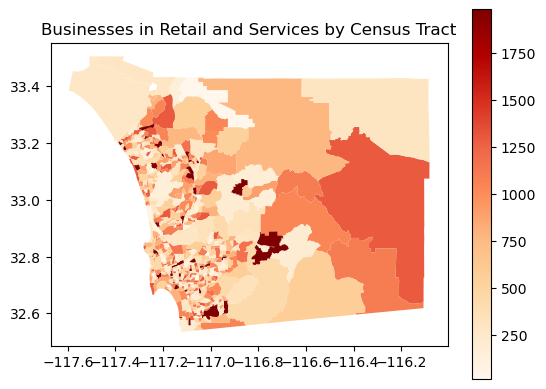

<Figure size 1200x600 with 0 Axes>

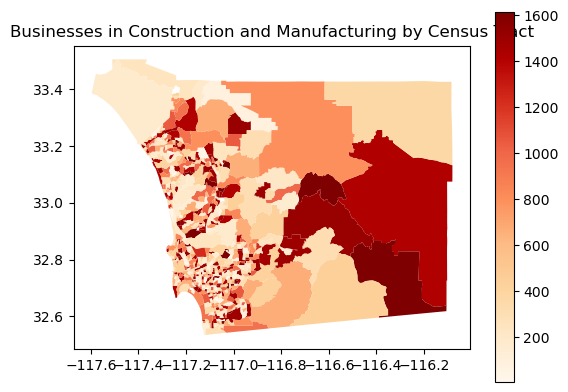

<Figure size 1200x600 with 0 Axes>

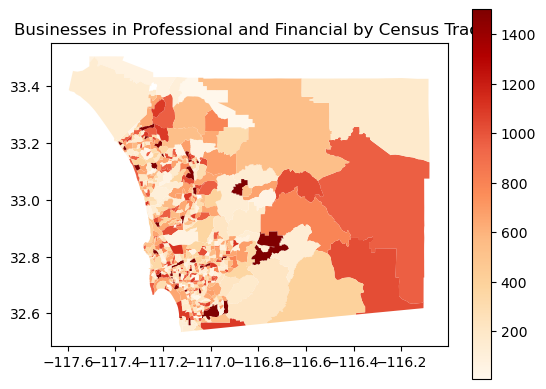

<Figure size 1200x600 with 0 Axes>

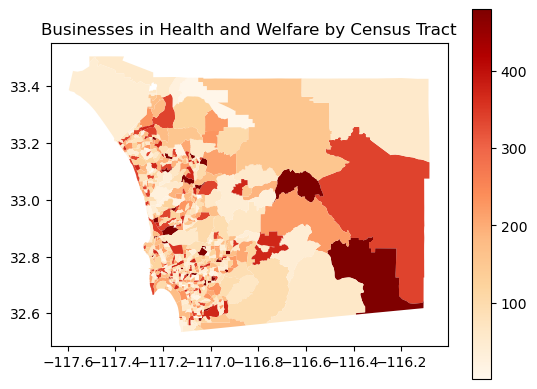

In [20]:
### For each of the 4 types of industries, graph how each looks in each the above graph

def plot_by_industry(census_tracts_data, businesses_data, industry):
    # Merge datasets based on a common key, e.g., 'census_tract_id'
    merged_data = pd.merge(census_tracts_data, businesses_data, how='left', on='CT')

    # Filter data for the specified industry
    industry_data = merged_data[merged_data['Industry'] == industry]

    # Group data by census tract and count the number of businesses
    grouped_data = gpd.GeoDataFrame(industry_data.groupby(['CT', 'geometry_x']).size().reset_index(name='business_count'))
    grouped_data.set_geometry("geometry_x", inplace=True)
    grouped_data.to_crs('EPSG:4326', inplace=True)

    # Plot the data
    plt.figure(figsize=(12, 6))
    grouped_data.plot(column='business_count', legend=True,cmap='OrRd')
    # plt.bar(grouped_data['CT'], grouped_data['business_count'])
    # plt.xlabel('Census Tract ID')
    # plt.ylabel('Number of Businesses')
    plt.title(f'Businesses in {industry} by Census Tract')
    plt.show()

    return grouped_data

for i in joined_tracts_new['Industry'].value_counts().index:
    plot_by_industry(new_tracts, joined_tracts_new, i)


<Axes: >

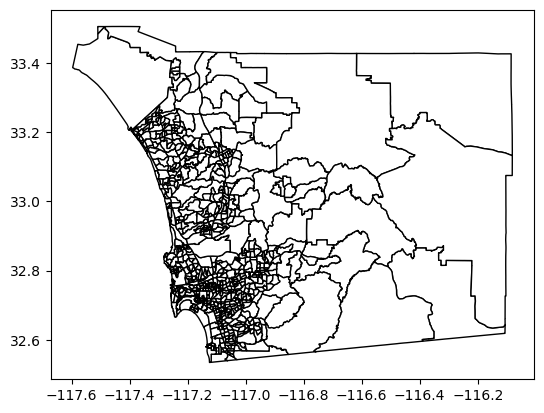

In [24]:
tracts.plot(color='white', edgecolor='black')

<Axes: >

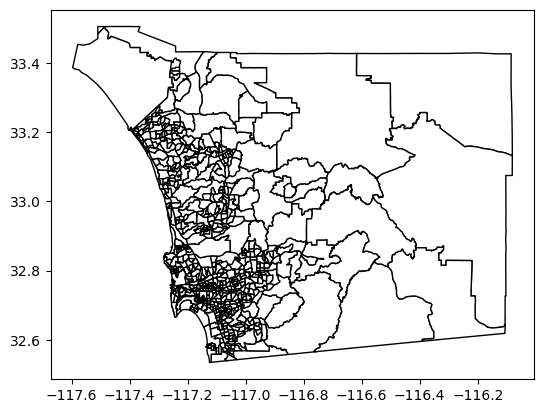

In [25]:
new_tracts.plot(color='white', edgecolor='black')